# Practice 8: Deep Learning in Neural Networks

Use this notebook as the starting point for the Practice activities.

Student Name:    **[  Put your Name Here ]**


*Video posted soon.*

## Pet Data Fields
- PetID - Unique hash ID of pet profile
- AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
- Type - Type of animal (1 = Dog, 2 = Cat)
- Name - Name of pet (Empty if not named)
- Age - Age of pet when listed, in months
- Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
- Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
- Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
- Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
- Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
- Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
- MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
- FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
- Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
- Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
- Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
- Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
- Quantity - Number of pets represented in profile
- Fee - Adoption fee (0 = Free)
- State - State location in Malaysia (Refer to StateLabels dictionary)
- RescuerID - Unique hash ID of rescuer
- VideoAmt - Total uploaded videos for this pet
- PhotoAmt - Total uploaded photos for this pet
- Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.
### AdoptionSpeed
Contestants are required to predict this value. The value is determined by how quickly, if at all, a pet is adopted. The values are determined in the following way: 
- 0 - Pet was adopted on the same day as it was listed. 
- 1 - Pet was adopted between 1 and 7 days (1st week) after being listed. 
- 2 - Pet was adopted between 8 and 30 days (1st month) after being listed. 
- 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed. 
- 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).

### File descriptions
- train.csv - Tabular/text data for the training set
- train.csv - Tabular/text data for the training set
- test.csv - Tabular/text data for the test set
- sample_submission.csv - A sample submission file in the correct format
- breed_labels.csv - Contains Type, and BreedName for each BreedID. Type 1 is dog, 2 is cat.
- color_labels.csv - Contains ColorName for each ColorID
- state_labels.csv - Contains StateName for each StateID

# Section 0

=== *You must run this section to set up things for any of the sections below * ===
### Setting up Python tools



We'll use three libraries for this tutorial: 
- [pandas](http://pandas.pydata.org/) : dataframes for spreadsheet-like data analysis, reading CSV files, time series
- [numpy](http://www.numpy.org/) : for multidimensional data and linear algebra tools
- [matplotlib](http://matplotlib.org/) : Simple plotting and graphing
- [seaborn](http://stanford.edu/~mwaskom/software/seaborn/) : more advanced graphing
-  [scikit-learn](https://scikit-learn.org/stable/) : provides many machine learning algorithms and tools to training and test.




In [1]:
# First, we'll import pandas and numpy, two data processing libraries
import pandas as pd
import numpy as np

# We'll also import seaborn and matplot, twp Python graphing libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import the needed sklearn libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# The Keras library provides support for neural networks and deep learning
print ("====== This should generate a FutureWaring on Conversion ===== ignore this warning")
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten, LSTM
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils

# We will turn off some warns in this notebook to make it easier to read for new students
import warnings
warnings.filterwarnings('ignore')

====== This should generate a FutureWaring on Conversion ===== ignore this warning


C:\Users\tgibbons\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Task 1: Past Kaggle result for Digit Challenge

In an eariler activite you created an account at Kaggle,  [www.Kaggle.com](https://www.kaggle.com/) most likely using your CSS email address with the "Sign up with Google" option


Return to the [Kaggle Digit Recognition challenge](https://www.kaggle.com/c/digit-recognizer) and find the top score for your submissions--click on the "My Submissions" tab. 

What was your top submission previously:  _ _ _ _ _ _ _ _ _ 

# Section 1:  Reducing the Learning Rate
=== *You must run Section 0 before this section* ===


### Set up the Input and output

- Training data: 42,000 images, each 28 x28 pixes, each labeled with the actual digit 0 - 9
- Submission data: 28,000 images, each 28 x 28 pixes, not labeled. You must generate predictions for each of these

### NOTE: This dataset is somewhat large and loading it may take a minute or two 


In [0]:
# Read data from the actual Kaggle download files stored in a raw file in GitHub
url_kaggle_train = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units7and8/master/kaggle-digit-recognizer/train.csv'
url_kaggle_test = 'https://raw.githubusercontent.com/CIS3115-Machine-Learning-Scholastica/CIS3115ML-Units7and8/master/kaggle-digit-recognizer/test.csv'
  
train_kaggle = pd.read_csv(url_kaggle_train)
# Pull out the labels or output which are saved in first index
y_train_kaggle = train_kaggle.iloc[:,0].values.astype('int32')
# Convert remaining values to floats
X_train_kaggle = (train_kaggle.iloc[:,1:].values).astype('float32')
# Read the kaggle test data which is used for submissions
X_submit_kaggle = (pd.read_csv(url_kaggle_test).values).astype('float32')
#reshape as 28x28 pixel images
X_train_kaggle = X_train_kaggle.reshape(X_train_kaggle.shape[0], 28, 28)
X_submit_kaggle = X_submit_kaggle.reshape(X_submit_kaggle.shape[0], 28, 28)

print ("X_train_kaggle training data shape of 28x28 pixels greyscale: " ,X_train_kaggle.shape)
print ("X_submit_kaggle submission data shape of 28x28 pixels greyscale: : " ,X_submit_kaggle.shape)

X_train_kaggle training data shape of 28x28 pixels greyscale:  (42000, 28, 28)
X_submit_kaggle submission data shape of 28x28 pixels greyscale: :  (28000, 28, 28)


In [55]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')
labels_breed = pd.read_csv('breed_labels.csv')
labels_state = pd.read_csv('color_labels.csv')
labels_color = pd.read_csv('state_labels.csv')

In [56]:
train.head(5)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [64]:
X_train = train[['Age','Gender','Health','MaturitySize','FurLength']]
X_train.head(5)
y_train = train['AdoptionSpeed']
print ("X_train training data shape: " ,X_train.shape)
print ("y_train training data shape: " ,y_train.shape)


X_train training data shape:  (14993, 5)
y_train training data shape:  (14993,)


In [65]:
# Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
#encodedVaccinated = train[['Vaccinated']] 
def fixVac( value ):
    if value > 1: return 0
    else: return value

#train['encodedVaccinated'] = list(map(lambda a: 0 if (a>1) else a,train['Vaccinated']))
X_train['encodedVaccinated'] = list(map(fixVac,train['Vaccinated']))

X_train.head(10)

,Age,Gender,Health,MaturitySize,FurLength,encodedVaccinated
0,3,1,1,1,1,0
1,1,1,1,2,2,0
2,1,1,1,2,2,1
3,4,2,1,2,1,1
4,1,1,1,2,1,0
5,3,2,1,2,1,0
6,12,1,1,2,3,0
7,0,2,1,2,1,0
8,2,2,1,2,2,0
9,12,2,1,2,2,0


In [66]:
encodedColor1 = to_categorical( train['Color1'] )
X_train['encodedColor1'] = encodedColor1.tolist()
#trainP = np.concatenate((trainP,encodedColor1), axis=1)
X_train.head(10)

,Age,Gender,Health,MaturitySize,FurLength,encodedVaccinated,encodedColor1
0,3,1,1,1,1,0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,1,1,1,2,2,0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2,1,1,1,2,2,1,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3,4,2,1,2,1,1,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
4,1,1,1,2,1,0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
5,3,2,1,2,1,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
6,12,1,1,2,3,0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
7,0,2,1,2,1,0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
8,2,2,1,2,2,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
9,12,2,1,2,2,0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [67]:
print ("X_train training data shape: " ,X_train.shape)
print ("y_train training data shape: " ,y_train.shape)

X_train training data shape:  (14993, 7)
y_train training data shape:  (14993,)


In [68]:
# Split the data into 80% for training and 10% for testing out the models
X_train, X_test, y_train_num, y_test_num = train_test_split(X_train, y_train, test_size=0.1)

In [70]:
X_test

,Age,Gender,Health,MaturitySize,FurLength,encodedVaccinated,encodedColor1
1417,3,2,1,3,1,1,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
13656,12,2,1,1,1,1,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3585,24,2,1,2,1,0,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
8771,4,2,1,2,2,0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
6823,2,2,1,1,1,0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
2515,2,1,1,2,1,1,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
7987,5,2,1,2,1,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
416,2,1,1,1,1,0,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
4505,3,1,1,2,1,0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
7389,2,2,1,2,1,0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [61]:
trainP = trainNN.values
trainP

array([[3, 1, 1, ..., 1, 0,
        list([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])],
       [1, 1, 1, ..., 2, 0,
        list([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])],
       [1, 1, 1, ..., 2, 1,
        list([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0])],
       ...,
       [2, 3, 1, ..., 2, 0,
        list([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0])],
       [9, 2, 1, ..., 1, 1,
        list([0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0])],
       [1, 1, 1, ..., 1, 0,
        list([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0])]], dtype=object)

In [40]:
encodedColor1 = to_categorical( train['Color1'] )
print(encodedColor1)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [28]:
trainP = np.concatenate((trainP,encodedColor1), axis=1)

In [4]:
print ("training data shape: " ,train.shape)
train.head(20)

training data shape:  (14993, 24)


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
5,2,NaN,3,266,0,2,5,6,0,2,...,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2
6,2,BULAT,12,264,264,1,1,0,0,2,...,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1
7,1,Siu Pak & Her 6 Puppies,0,307,0,2,1,2,7,2,...,1,6,0,41326,1fba5f6e5480946254590d48f9c5198d,0,Siu Pak just give birth on 13/6/10 to 6puppies...,97aa9eeac,9.0,3
8,2,NaN,2,265,0,2,6,0,0,2,...,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1
9,2,Kitty,12,265,0,2,1,7,0,2,...,1,1,0,41326,1f3f36e4b18e94855b3e88af0852fdc4,0,"Very manja and gentle stray cat found, we woul...",7a0942d61,2.0,4


## Set up the data

**Scale Data:** Neural Networks work best with the inputs are between 0 and +1, but the grayscale images have pixel values between 0 and 255. So, each pixel value is divided by 255 to scale it.

**Reformatting: **Above we reformatted the data into 28x28 pixel arrays so we could display it. Now we are converting it back to a single list of 784 pixels. ( 28 x 28 = 784)

**Split the Data:** The training data is split with 90% used for training and 10% used for testing.

**One-Hot Encoding:** A one-hot encoding is a list which is 0 in most positions, and 1 in a single positions.  In this case, the nth digit will be represented as a vector which is 1 in the nth dimension.

- For example, 3 would be [0,0,0,1,0,0,0,0,0,0]

In [0]:

input_Size = 28 * 28    # images are 28 x 28 pixels or 784 pixels
output_Size = 10

# Normalize the data so values are between 0 and 1 instead of between 0 and 255
X_train_kaggle = X_train_kaggle / 255
X_submit_kaggle = X_submit_kaggle / 255

#reshape for dense-only inputs
train_size = X_train_kaggle.shape[0]
submit_size = X_submit_kaggle.shape[0]
X_train_kaggle = X_train_kaggle.reshape(train_size, 28 * 28)
X_submit_kaggle = X_submit_kaggle.reshape(submit_size, 28 * 28)

# Split the data into 80% for training and 10% for testing out the models
X_train, X_test, y_train_num, y_test_num = train_test_split(X_train_kaggle, y_train_kaggle, test_size=0.1)

# A one-hot encoding is a list which is 0 in most positions, and 1 in a single positions. 
# In this case, the nth digit will be represented as a vector which is 1 in the nth dimension.
# For example, 3 would be [0,0,0,1,0,0,0,0,0,0].
y_train = np_utils.to_categorical(y_train_num, output_Size)
y_test = np_utils.to_categorical(y_test_num, output_Size)


In [0]:
print ("X_train training data shape of 28x28 pixels greyscale: " ,X_train.shape)
print ("X_test submission data shape of 28x28 pixels greyscale: : " ,X_test.shape)

print ("y_train training data shape of 28x28 pixels greyscale: " ,y_train.shape)
print ("y_test submission data shape of 28x28 pixels greyscale: : " ,y_test.shape)

X_train training data shape of 28x28 pixels greyscale:  (37800, 784)
X_test submission data shape of 28x28 pixels greyscale: :  (4200, 784)
y_train training data shape of 28x28 pixels greyscale:  (37800, 10)
y_test submission data shape of 28x28 pixels greyscale: :  (4200, 10)


## Neural Network

The following code sets up a sequential, four layer neural network. Sequential means that each layer is connected to the layer listed before it:
- Input layer: 784 pixels (28x28) used as input values
- Hidden layer 1: 20 units using Rectified Linear Units (relu)
- Hidden layer 2: 10 units using Rectified Linear Units (relu)
- Output  layer: 10 units using softmax to predict the correct digit between 0 and 9
---


## Task 2: Deeper Networks

As describe above, the network below has an input layer, 2 hidden layers, and on output layer. Modify the network by adding at least one more hidden layer. Also consider making the hidden layers larger.

One possibly configuration would be:

```
DigitNN = Sequential()
DigitNN.add(Dense(50, activation='relu', input_dim=(input_Size)))
DigitNN.add(Dense(40, activation='relu'))
DigitNN.add(Dense(30, activation='relu'))
DigitNN.add(Dense(20, activation='relu'))
DigitNN.add(Dense(output_Size, activation='softmax'))
```

Though you should try your own configuration. We will eventually look at networks of 50+ layers, but for now I suggest you limit yourself to 3-5 hidden layers. 


*Note: You should not change the input or output layers, they are fixed by our problem definition*


In [0]:
# Set up the Neural Network
input_Size = 28 * 28    # images are 28 x 28 pixels or 784 pixels
output_Size = 10

DigitNN = Sequential()
DigitNN.add(Dense(50, activation='relu', input_dim=(input_Size)))
DigitNN.add(Dense(40, activation='relu'))
DigitNN.add(Dropout(0.5))
DigitNN.add(Dense(30, activation='relu'))
DigitNN.add(Dense(20, activation='relu'))
DigitNN.add(Dense(output_Size, activation='softmax'))


## Task 5: Fighting Overfitting (Please do Tasks 3 and 4 below first)

When out network gets large enough and our training refined, our network can learn to memorize all the input features. In these cases our prediction accuracy on the training data may reach 100%. But our test accuracy might be lower, say 94%. 

This is called [Overfitting](https://en.wikipedia.org/wiki/Overfitting). The model has memorized the training data, but not generalize the rules enough to predict new inputs. For more information see [Overfitting in Machine Learning: What It Is and How to Prevent It](https://elitedatascience.com/overfitting-in-machine-learning)

The network only learns when there is a mistake between what the model predicts and what it is suppose to predict. If the model is 100% accurate in training, it is not making any mistakes and so not learning or changing the weights at all.

One way to prevent overfitting is to introduce some "noise" into the training. One way researcher have found helpful is to randomly skip certain weights when updating a neuron. Keras can do this with a [dropout layer](https://keras.io/layers/core/). 

### Question 1: Do you have Overfitting?

After adding more layers to your network and reducing the Learning Rate, does you model overfit the data? That is, does it work really well on the training data, but not so well on the testing data?

### Question 2: Try some Dropout layers

Add one or more Dropout layers to your network. The following code adds a Dropout layer between two hidden layers that will randomly ignote 50% of the weights each time.

```
DigitNN.add(Dense(40, activation='relu'))
DigitNN.add(Dropout(0.5))
DigitNN.add(Dense(30, activation='relu'))
```
Add one or more Dropout(0.5) layers to your network. Train it and describe how it performs.

### Question 3: Try lower Dropout rates

Try a lower dropout rate such as, Dropout(0.1), and retrain the network. Describe how it performs.




## Compile Neural Network

This builds the Neural network. You must specify 
- optimizer = 'adam' is a common gradient decent method for changing the wieghts during training
- loss =  'categorical_crossentropy' is used when you have a number of distinct categories and items can only be in one category.
- metrics = 'accuracy' will output the accuracy of the classification, the percent of time the network gets the classification correct

In [0]:
# Compile neural network model
DigitNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the Neural Network

This will run all 37800 training images through the network and update the weights. 

- epochs = 10 means to run the training 10 times. 
- Performance measues:
 - loss: is a measurement of how far the outputs are from the desired outputs. This should get smaller over time.
 - acc: is the prediction accuracy as a percent so 0.67 means the model predicts the correct flower 67% of the time. 
 - val_loss: the loss calculated using the testing flowers rather than the training flowers.
 - val_acc: the accuracy calculated using the testing flowers rather than the training flowers.
 
 
### Note: This is a large data set and training will be slow. This might take a couple of minutes to run. 

This is why we are only using 10 epochs initially

## Task 3: Reducing the Learning Rate

### Learning Rate

The Learning Rate determines how much the weights in a neural network are changed during training. When the Learning Rate is set correctly, the network weights are changed a little bit for each input--in our case for each digit image. These slight adjustments from each digit image allow the network to learn all the weights over a long time.

For more on the Learning Rate, see [Understanding Learning Rates and How It Improves Performance in Deep Learning](https://towardsdatascience.com/understanding-learning-rates-and-how-it-improves-performance-in-deep-learning-d0d4059c1c10)

### Learning Too Fast
If the learning rate is too high, when the network is trained on an image of a "4" it may change the weights too much and erase the weight changes for the "3". The network will learn too fast causing each new image learned to degrade the performance on past images.  

### Learning Too Slow

If the Learning Rate is too low, the network is learn very slowly. But long training times can compensate for this, but the network may get stuck in "local minima" which are places where any small weight change does not improve the model, but a larger weight change would. 

Imagine you are in a mountain valley where walking in any direction goes up hill. You may be able to go down hill again if you first go uphill for a short while.
![alt text](https://i.stack.imgur.com/rPx0Q.png)

### Reducing the Learning Rate over time

Keras uses a feature named Callbacks to adjust the learning rate as needed. See the documentation for
[ReduceLROnPlateau](https://keras.io/callbacks/#reducelronplateau). Run the code cells below to setup the neural network until you get to Task 2 below where you will implement learning rate reduction

The code below defines a callback,  learning_rate_reduction, which will automatically reduce the learning rate at certain times. Answer the following questions using the documentation for
[ReduceLROnPlateau](https://keras.io/callbacks/#reducelronplateau). 

### Question 1: What does the "patience" parameter control?

### Question 2: How much does the Learning Rate get reduced each time?



In [0]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

learning_rate_reduction = ReduceLROnPlateau(monitor='accuracy', 
                                            patience=3, 
                                            verbose=2, 
                                            factor=0.3, 


## Task 4: Other Callbacks

Since we just learned about the ReduceLROnPlateau callback, let's also look at two others that are commonly used.

### Question1: What does the [EarlyStopping callback](https://keras.io/callbacks/#earlystopping) do?


### Question 2: What does the [ModelCheckpoint callback](https://keras.io/callbacks/#modelcheckpoint) do?

### Question 3: Which callbacks are being used? 

Look at the code two cells below where `DigitNN.fit()` is called. What callbacks are listed to be used when fit() is called?

In [0]:

from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

early_stops = EarlyStopping(monitor='accuracy', 
                            min_delta=0, 
                            patience=6, 
                            verbose=2, 
                            mode='auto')

checkpointer = ModelCheckpoint(filepath = 'cis3115_MNIST.{epoch:02d}-{accuracy:.6f}.hdf5',
                               verbose=2,
                               save_best_only=True, 
                               save_weights_only = True)


In [0]:
# Fit model on training data for network with dense input layer

history = DigitNN.fit(X_train, y_train,
          epochs=100,
          verbose=1,
          callbacks=[learning_rate_reduction, early_stops],
          validation_data=(X_test, y_test))


Train on 37800 samples, validate on 4200 samples
Epoch 1/100
37800/37800 [==============================] - 3s 73us/step - loss: 0.6206 - acc: 0.8097 - val_loss: 0.2426 - val_acc: 0.9286
Epoch 2/100
37800/37800 [==============================] - 2s 62us/step - loss: 0.3312 - acc: 0.9014 - val_loss: 0.2020 - val_acc: 0.9414
Epoch 3/100
37800/37800 [==============================] - 2s 62us/step - loss: 0.2744 - acc: 0.9190 - val_loss: 0.1656 - val_acc: 0.9524
Epoch 4/100
37800/37800 [==============================] - 2s 61us/step - loss: 0.2397 - acc: 0.9278 - val_loss: 0.1552 - val_acc: 0.9533
Epoch 5/100
37800/37800 [==============================] - 2s 61us/step - loss: 0.2186 - acc: 0.9349 - val_loss: 0.1381 - val_acc: 0.9590
Epoch 6/100
37800/37800 [==============================] - 2s 61us/step - loss: 0.2038 - acc: 0.9390 - val_loss: 0.1362 - val_acc: 0.9595
Epoch 7/100
37800/37800 [==============================] - 2s 61us/step - loss: 0.1906 - acc: 0.9432 - val_loss: 0.1315 - v

In [0]:
# 10. Evaluate model on test data
print ("Running final scoring on test data")
score = DigitNN.evaluate(X_test, y_test, verbose=1)
print ("The accuracy for this model is ", format(score[1], ",.2f"))

Running final scoring on test data
4200/4200 [==============================] - 0s 26us/step
The accuracy for this model is  0.97


## Plot the Training History

We store the performance during training is a variable named 'history'. The x-axis is the training time or number of epochs.

- Accuracy: Accuracy of the predictions, hopefully this is increasing to near 1.0
- Loss: How close the output is to the desired output, this should decrease to near 0.0

(0, 1)

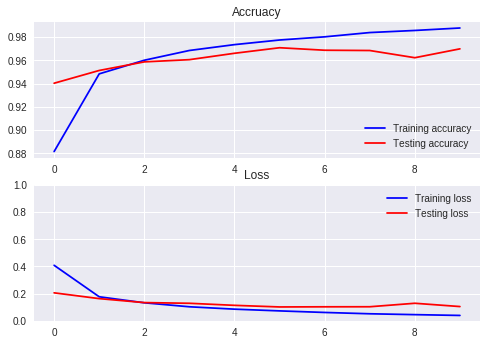

In [0]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)

ax[0].plot(history.history['acc'], color='b', label="Training accuracy")
ax[0].plot(history.history['val_acc'], color='r',label="Testing accuracy")
ax[0].set_title("Accruacy")
legend = ax[0].legend(loc='best', shadow=True)
              
ax[1].plot(history.history['loss'], color='b', label="Training loss")
ax[1].plot(history.history['val_loss'], color='r', label="Testing loss",axes =ax[1])
ax[1].set_title("Loss")
legend = ax[1].legend(loc='best', shadow=True)
plt.ylim(0,1)

# Section 2: Create the Submission for Kaggle

The following code generates a file named CIS3115_Submission.csv which you need to download to your local PC and then upload to [Kaggle's Digit Recognition competition](https://www.kaggle.com/c/digit-recognizer/submit).

### Loading and Saving Weights

As our networks get more complicated, it will take longer (often hours, if not days) to train them. At certain points you may want to save the weights for the network or load the wieghts. 

- This code can be used to save the weights of the current model to a file

```
DigitNN.save_weights('cis3115_model_save_1.hdf5')
```

- This code can be used to load the weights saved in a file

```
DigitNN.load_weights('cis3115_model_save_1.hdf5')
```







In [0]:
predictions = DigitNN.predict_classes(X_submit_kaggle, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)), "Label": predictions})

submissions.to_csv("CIS3115_Submission.csv", index=False, header=True)

## Kaggle Submission

Run the code above after training the network above. It will go through the 28,000 submission images and generate an prediction for each. These are saved in a file named "CIS3115_Submission.csv"

**Colab Users: ** The submission file is stored in the Colab files tied to this colab notebook in the Google cloud. 
1. Open the left-side menu by clicking on the > icon near the top-left
2. Select the file tab
3. Hit the Refresh button and the file should be displayed in the list
4. Right-click on the file and choose "Download" and save it to a folder on your PC.

**Juptyter Notebook Users: ** The submission file will be stored in the same folder as your Jupyter notebook file.

Once you have the file, return to  the [Kaggle Digit Recognition challenge](https://www.kaggle.com/c/digit-recognizer) and select the Submit button. Follow the steps to upload your submission and see how it scores.

Record your initial submission score here: _ _ _ _ _ _ _ _ _ _ _ _


## Task 7: Report Best Score

Try finding a good mix of the following:

1. Number and size of hidden layers

1. Number and rate of dropout layers

1. Learning Rate reduction

Submit your best network to the [Kaggle Digit Recognition challenge](https://www.kaggle.com/c/digit-recognizer) and compare it to your original score

Original Kaggle scores here:  _ _ _ _ _ _ _ _ _ _
Best Kaggle scores here:  _ _ _ _ _ _ _ _ _ _



# Wrapping Up

Remember to **share this sheet with your instructo**r and submit a link to it in Blackboard.